In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
# %matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# path  = r'./datasets/FeatureVector'
# print(path)
# import os

In [3]:
# csvs =  os.listdir(path)
# print(csvs)

In [4]:
from datasets.datasets import TrainFeatureData, FaceFeatureData

# Create dataset

# 3 tasks
num_of_people = 800
# 18 examples
num_of_images= 18
# dataset = FaceFeatureData(num_of_people=num_of_people, num_of_images=num_of_images)
dataset = TrainFeatureData(num_of_people=num_of_people, num_of_images=num_of_images)

#82 different people(batch_num)
#18 different images each people(batch_size)
#x_dim = 2048

In [5]:
# dataset[2] # there are 4 csvs have "nan" in their data
torch.FloatTensor(dataset[0][0]).size() 

torch.Size([512])

In [6]:
from model.NeuralProcessModel import NeuralProcess, NeuralProcessEncoder, NeuralProcessDecoder

# Build Neural Process

x_dim = 512
y_dim = 1
r_dim = 50  # Dimension of representation of context points
z_dim = 50  # Dimension of sampled latent variable
h_dim = 50  # Dimension of hidden layers in encoder and decoder

# neuralprocess = NeuralProcess(x_dim, y_dim, r_dim, z_dim, h_dim)
neuralprocess = {} # a dict
neuralprocess['encoder'] = NeuralProcessEncoder(x_dim, y_dim, r_dim, z_dim, h_dim)#.to(device)
# neuralprocess_decoder = {} # a dict
for i in range(1):
    neuralprocess[i] = NeuralProcessDecoder(x_dim, y_dim, z_dim, h_dim)#.to(device)

In [7]:
print(neuralprocess)

{'encoder': NeuralProcessEncoder(
  (xy_to_r): Encoder(
    (input_to_hidden): Sequential(
      (0): Linear(in_features=513, out_features=50, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=50, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=50, out_features=50, bias=True)
    )
  )
  (r_to_mu_sigma): MuSigmaEncoder(
    (r_to_hidden): Linear(in_features=50, out_features=50, bias=True)
    (hidden_to_mu): Linear(in_features=50, out_features=50, bias=True)
    (hidden_to_sigma): Linear(in_features=50, out_features=50, bias=True)
  )
), 0: NeuralProcessDecoder(
  (xz_to_y): Decoder(
    (xz_to_hidden): Sequential(
      (0): Linear(in_features=562, out_features=50, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=50, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): Linear(in_features=50, out_features=50, bias=True)
      (5): ReLU(inplace=True)
    )
    (hidden_to_mu): Linear(in_fea

In [8]:
# print(neuralprocess_encoder)

In [9]:
# print(neuralprocess_decoder)

In [10]:
# i = 0
# for child in neuralprocess.children():
#     i += 1
#     print(i)
#     print(child)
    
#     break

In [11]:
# for param in neuralprocess_encoder.parameters():
#     print(param)

In [12]:
# from base import BaseTrainer
# print(BaseTrainer)

In [13]:
# from data_loader.data_loader import FGNetDataLoader

# data_loader = FGNetDataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [14]:
# for i, data in enumerate(data_loader):
#     print(i)
    
#     x, y = data
#     print(x.size())
#     print(y.size())

In [15]:
from data_loader.data_loader import FGNetDataLoader
from random import randint

batch_size = 8

data_loader = FGNetDataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# 72 training = 8*9
for i, data in enumerate(data_loader):
    print('*****************************')
    print(i)
    print(data[0].size())
    print(data[1].size())

# Sample number of context and target points
    num_context = randint(*(7,7))  # since num_context_range is a tuple, use * to allow variable length of parameters
    num_extra_target = randint(*(1,1))
#     print(num_context)
#     print(num_extra_target)
    
# Create context and target points and apply neural process
    x, y = data
#     print(x.size())
#     print(y.size())
    locations = np.random.choice(num_context + num_extra_target,
                             size=num_context + num_extra_target,
                             replace=False)
    print(locations)
#     num_points = x.shape[1]
    # Sample locations of context and target points
#     locations = np.random.choice(num_points,
#                              size=num_context + num_extra_target,
#                              replace=False)
    x_context = x[locations[:num_context], :]
    print("y:", y)
    y_context = y[locations[:num_context]]
    print('y_context', y_context)
    x_target = x[locations, :]
    y_target = y[locations]
    print('y_target', y_target)


*****************************
0
torch.Size([8, 512])
torch.Size([8])
[1 0 2 4 5 7 3 6]
y: tensor([ 8, 55, 12, 24,  8, 14, 16, 15])
y_context tensor([55,  8, 12,  8, 14, 15, 24])
y_target tensor([55,  8, 12,  8, 14, 15, 24, 16])
*****************************
1
torch.Size([8, 512])
torch.Size([8])
[7 0 4 3 5 6 2 1]
y: tensor([22, 41, 33,  2,  1, 25, 16, 34])
y_context tensor([34, 22,  1,  2, 25, 16, 33])
y_target tensor([34, 22,  1,  2, 25, 16, 33, 41])
*****************************
2
torch.Size([8, 512])
torch.Size([8])
[1 3 6 5 7 4 2 0]
y: tensor([15,  1, 10, 25,  3, 12, 22, 31])
y_context tensor([ 1, 25, 22, 12, 31,  3, 10])
y_target tensor([ 1, 25, 22, 12, 31,  3, 10, 15])
*****************************
3
torch.Size([8, 512])
torch.Size([8])
[5 1 0 3 4 2 7 6]
y: tensor([ 6, 19,  6,  8,  0, 15, 16,  2])
y_context tensor([15, 19,  6,  8,  0,  6,  2])
y_target tensor([15, 19,  6,  8,  0,  6,  2, 16])
*****************************
4
torch.Size([8, 512])
torch.Size([8])
[1 2 6 5 3 7 0 4]
y

*****************************
69
torch.Size([8, 512])
torch.Size([8])
[1 0 7 4 3 6 5 2]
y: tensor([18,  1, 10,  2,  0,  8, 23,  5])
y_context tensor([ 1, 18,  5,  0,  2, 23,  8])
y_target tensor([ 1, 18,  5,  0,  2, 23,  8, 10])
*****************************
70
torch.Size([8, 512])
torch.Size([8])
[1 6 3 4 7 0 5 2]
y: tensor([25,  1, 15,  6, 33,  3, 25, 39])
y_context tensor([ 1, 25,  6, 33, 39, 25,  3])
y_target tensor([ 1, 25,  6, 33, 39, 25,  3, 15])
*****************************
71
torch.Size([8, 512])
torch.Size([8])
[5 4 0 1 2 6 3 7]
y: tensor([38, 23,  0, 17,  8, 14, 16,  4])
y_context tensor([14,  8, 38, 23,  0, 16, 17])
y_target tensor([14,  8, 38, 23,  0, 16, 17,  4])
*****************************
72
torch.Size([8, 512])
torch.Size([8])
[1 2 3 7 4 6 0 5]
y: tensor([ 4, 28,  5,  9,  3,  6, 13,  9])
y_context tensor([28,  5,  9,  9,  3, 13,  4])
y_target tensor([28,  5,  9,  9,  3, 13,  4,  6])
*****************************
73
torch.Size([8, 512])
torch.Size([8])
[1 2 3 5 6 7 4

In [16]:
# a_i = torch.randn(batch_size, r_dim)
# a = torch.mean(a_i, dim=0)
# a.shape

# print(a.unsqueeze(1).repeat(1,8))
# print(a.unsqueeze(1))

log_likelihood tensor(-2523.7300, grad_fn=<SumBackward0>)
kl tensor(2.0695e-07, grad_fn=<SumBackward0>)
log_likelihood tensor(-3075.0823, grad_fn=<SumBackward0>)
kl tensor(4.7290e-06, grad_fn=<SumBackward0>)
log_likelihood tensor(-3983.2441, grad_fn=<SumBackward0>)
kl tensor(1.6509e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-2553.6167, grad_fn=<SumBackward0>)
kl tensor(7.8804e-06, grad_fn=<SumBackward0>)
log_likelihood tensor(-6650.4873, grad_fn=<SumBackward0>)
kl tensor(9.9382e-07, grad_fn=<SumBackward0>)
log_likelihood tensor(-4176.1533, grad_fn=<SumBackward0>)
kl tensor(2.5368e-07, grad_fn=<SumBackward0>)
log_likelihood tensor(-4676.9224, grad_fn=<SumBackward0>)
kl tensor(6.8667e-06, grad_fn=<SumBackward0>)
Epoch: 0, Avg_loss: 14175.425711495536
log_likelihood tensor(-6563.7803, grad_fn=<SumBackward0>)
kl tensor(1.2129e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-2348.9270, grad_fn=<SumBackward0>)
kl tensor(1.3947e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-40

log_likelihood tensor(-7359.4155, grad_fn=<SumBackward0>)
kl tensor(1.5819e-05, grad_fn=<SumBackward0>)
Epoch: 10, Avg_loss: 13153.7685546875
log_likelihood tensor(-2192.2986, grad_fn=<SumBackward0>)
kl tensor(7.5395e-07, grad_fn=<SumBackward0>)
log_likelihood tensor(-5223.0229, grad_fn=<SumBackward0>)
kl tensor(8.6953e-07, grad_fn=<SumBackward0>)
log_likelihood tensor(-1772.8895, grad_fn=<SumBackward0>)
kl tensor(4.9584e-06, grad_fn=<SumBackward0>)
log_likelihood tensor(-1969.3619, grad_fn=<SumBackward0>)
kl tensor(3.6765e-06, grad_fn=<SumBackward0>)
log_likelihood tensor(-1430.2148, grad_fn=<SumBackward0>)
kl tensor(3.0675e-07, grad_fn=<SumBackward0>)
log_likelihood tensor(-4292.3408, grad_fn=<SumBackward0>)
kl tensor(1.9051e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-2172.2222, grad_fn=<SumBackward0>)
kl tensor(1.2949e-07, grad_fn=<SumBackward0>)
Epoch: 11, Avg_loss: 11210.524658203125
log_likelihood tensor(-2244.6477, grad_fn=<SumBackward0>)
kl tensor(7.7276e-05, grad_fn=<S

log_likelihood tensor(-6894.4653, grad_fn=<SumBackward0>)
kl tensor(3.9400e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-4490.1440, grad_fn=<SumBackward0>)
kl tensor(2.4035e-06, grad_fn=<SumBackward0>)
Epoch: 22, Avg_loss: 13366.43589564732
log_likelihood tensor(-4276.7329, grad_fn=<SumBackward0>)
kl tensor(5.3841e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-3501.0420, grad_fn=<SumBackward0>)
kl tensor(7.5112e-06, grad_fn=<SumBackward0>)
log_likelihood tensor(-2918.6890, grad_fn=<SumBackward0>)
kl tensor(1.5279e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-2753.9058, grad_fn=<SumBackward0>)
kl tensor(2.7651e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-1439.2535, grad_fn=<SumBackward0>)
kl tensor(1.9861e-07, grad_fn=<SumBackward0>)
log_likelihood tensor(-1818.0914, grad_fn=<SumBackward0>)
kl tensor(2.0117e-06, grad_fn=<SumBackward0>)
log_likelihood tensor(-2981.6550, grad_fn=<SumBackward0>)
kl tensor(9.1694e-07, grad_fn=<SumBackward0>)
Epoch: 23, Avg_loss: 1249

log_likelihood tensor(-2587.3870, grad_fn=<SumBackward0>)
kl tensor(3.2123e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-1150.0176, grad_fn=<SumBackward0>)
kl tensor(7.0379e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-5181.6162, grad_fn=<SumBackward0>)
kl tensor(0.0003, grad_fn=<SumBackward0>)
Epoch: 34, Avg_loss: 11894.304931640625
log_likelihood tensor(-3120.9751, grad_fn=<SumBackward0>)
kl tensor(2.9322e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-1424.6484, grad_fn=<SumBackward0>)
kl tensor(1.3655e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-1636.8768, grad_fn=<SumBackward0>)
kl tensor(7.0778e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-2174.9292, grad_fn=<SumBackward0>)
kl tensor(1.3251e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-6899.8174, grad_fn=<SumBackward0>)
kl tensor(9.1247e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-4083.4685, grad_fn=<SumBackward0>)
kl tensor(1.7126e-07, grad_fn=<SumBackward0>)
log_likelihood tensor(-3438.

log_likelihood tensor(-1604.7612, grad_fn=<SumBackward0>)
kl tensor(0.0004, grad_fn=<SumBackward0>)
log_likelihood tensor(-1146.6271, grad_fn=<SumBackward0>)
kl tensor(0.0003, grad_fn=<SumBackward0>)
log_likelihood tensor(-1576.0044, grad_fn=<SumBackward0>)
kl tensor(0.0003, grad_fn=<SumBackward0>)
log_likelihood tensor(-3653.9429, grad_fn=<SumBackward0>)
kl tensor(1.1992e-05, grad_fn=<SumBackward0>)
Epoch: 46, Avg_loss: 12071.816476004464
log_likelihood tensor(-1707.7212, grad_fn=<SumBackward0>)
kl tensor(5.3148e-06, grad_fn=<SumBackward0>)
log_likelihood tensor(-2226.6318, grad_fn=<SumBackward0>)
kl tensor(0.0005, grad_fn=<SumBackward0>)
log_likelihood tensor(-3362.7415, grad_fn=<SumBackward0>)
kl tensor(0.0002, grad_fn=<SumBackward0>)
log_likelihood tensor(-1465.4022, grad_fn=<SumBackward0>)
kl tensor(0.0005, grad_fn=<SumBackward0>)
log_likelihood tensor(-6401.5918, grad_fn=<SumBackward0>)
kl tensor(0.0002, grad_fn=<SumBackward0>)
log_likelihood tensor(-1155.6281, grad_fn=<SumBackwa

log_likelihood tensor(-840.5638, grad_fn=<SumBackward0>)
kl tensor(0.0008, grad_fn=<SumBackward0>)
log_likelihood tensor(-1225.1470, grad_fn=<SumBackward0>)
kl tensor(1.5971e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-1229.0122, grad_fn=<SumBackward0>)
kl tensor(1.4348e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-1867.3303, grad_fn=<SumBackward0>)
kl tensor(0.0010, grad_fn=<SumBackward0>)
Epoch: 58, Avg_loss: 7256.102120535715
log_likelihood tensor(-1076.0388, grad_fn=<SumBackward0>)
kl tensor(0.0011, grad_fn=<SumBackward0>)
log_likelihood tensor(-475.8621, grad_fn=<SumBackward0>)
kl tensor(1.1202e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-1910.8805, grad_fn=<SumBackward0>)
kl tensor(2.8151e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-1162.1853, grad_fn=<SumBackward0>)
kl tensor(0.0012, grad_fn=<SumBackward0>)
log_likelihood tensor(-1762.8925, grad_fn=<SumBackward0>)
kl tensor(0.0011, grad_fn=<SumBackward0>)
log_likelihood tensor(-1139.6968, grad_fn=<SumB

Epoch: 69, Avg_loss: 2109.8096836635045
log_likelihood tensor(-399.9146, grad_fn=<SumBackward0>)
kl tensor(0.0003, grad_fn=<SumBackward0>)
log_likelihood tensor(-691.0693, grad_fn=<SumBackward0>)
kl tensor(0.0413, grad_fn=<SumBackward0>)
log_likelihood tensor(-218.8579, grad_fn=<SumBackward0>)
kl tensor(0.0096, grad_fn=<SumBackward0>)
log_likelihood tensor(-245.8771, grad_fn=<SumBackward0>)
kl tensor(0.0156, grad_fn=<SumBackward0>)
log_likelihood tensor(-393.9141, grad_fn=<SumBackward0>)
kl tensor(0.0070, grad_fn=<SumBackward0>)
log_likelihood tensor(-611.0199, grad_fn=<SumBackward0>)
kl tensor(0.0079, grad_fn=<SumBackward0>)
log_likelihood tensor(-361.6263, grad_fn=<SumBackward0>)
kl tensor(0.0040, grad_fn=<SumBackward0>)
Epoch: 70, Avg_loss: 1684.2036873953682
log_likelihood tensor(-274.1284, grad_fn=<SumBackward0>)
kl tensor(0.0056, grad_fn=<SumBackward0>)
log_likelihood tensor(-290.6971, grad_fn=<SumBackward0>)
kl tensor(0.0272, grad_fn=<SumBackward0>)
log_likelihood tensor(-360.42

log_likelihood tensor(-107.3749, grad_fn=<SumBackward0>)
kl tensor(0.0443, grad_fn=<SumBackward0>)
log_likelihood tensor(-82.0527, grad_fn=<SumBackward0>)
kl tensor(0.0003, grad_fn=<SumBackward0>)
log_likelihood tensor(-64.4274, grad_fn=<SumBackward0>)
kl tensor(0.0175, grad_fn=<SumBackward0>)
log_likelihood tensor(-130.4455, grad_fn=<SumBackward0>)
kl tensor(0.0425, grad_fn=<SumBackward0>)
log_likelihood tensor(-123.4558, grad_fn=<SumBackward0>)
kl tensor(0.2351, grad_fn=<SumBackward0>)
Epoch: 81, Avg_loss: 327.4128090994699
log_likelihood tensor(-116.3898, grad_fn=<SumBackward0>)
kl tensor(0.1095, grad_fn=<SumBackward0>)
log_likelihood tensor(-75.8536, grad_fn=<SumBackward0>)
kl tensor(0.0021, grad_fn=<SumBackward0>)
log_likelihood tensor(-72.6552, grad_fn=<SumBackward0>)
kl tensor(6.2145e-06, grad_fn=<SumBackward0>)
log_likelihood tensor(-67.9195, grad_fn=<SumBackward0>)
kl tensor(0.0068, grad_fn=<SumBackward0>)
log_likelihood tensor(-118.3102, grad_fn=<SumBackward0>)
kl tensor(0.01

Epoch: 92, Avg_loss: 165.23696953909737
log_likelihood tensor(-45.3877, grad_fn=<SumBackward0>)
kl tensor(0.0891, grad_fn=<SumBackward0>)
log_likelihood tensor(-40.1018, grad_fn=<SumBackward0>)
kl tensor(0.0541, grad_fn=<SumBackward0>)
log_likelihood tensor(-40.7956, grad_fn=<SumBackward0>)
kl tensor(0.0007, grad_fn=<SumBackward0>)
log_likelihood tensor(-41.2486, grad_fn=<SumBackward0>)
kl tensor(2.8892e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-35.3804, grad_fn=<SumBackward0>)
kl tensor(0.0257, grad_fn=<SumBackward0>)
log_likelihood tensor(-33.2026, grad_fn=<SumBackward0>)
kl tensor(0.0141, grad_fn=<SumBackward0>)
log_likelihood tensor(-41.6460, grad_fn=<SumBackward0>)
kl tensor(0.0314, grad_fn=<SumBackward0>)
Epoch: 93, Avg_loss: 163.22553035191126
log_likelihood tensor(-36.4890, grad_fn=<SumBackward0>)
kl tensor(0.1645, grad_fn=<SumBackward0>)
log_likelihood tensor(-38.7153, grad_fn=<SumBackward0>)
kl tensor(0.0037, grad_fn=<SumBackward0>)
log_likelihood tensor(-48.1166, gr

Epoch: 104, Avg_loss: 145.61240604945593
log_likelihood tensor(-34.2829, grad_fn=<SumBackward0>)
kl tensor(0.0316, grad_fn=<SumBackward0>)
log_likelihood tensor(-37.0290, grad_fn=<SumBackward0>)
kl tensor(0.0990, grad_fn=<SumBackward0>)
log_likelihood tensor(-36.7938, grad_fn=<SumBackward0>)
kl tensor(0.0532, grad_fn=<SumBackward0>)
log_likelihood tensor(-27.3592, grad_fn=<SumBackward0>)
kl tensor(0.0178, grad_fn=<SumBackward0>)
log_likelihood tensor(-40.4368, grad_fn=<SumBackward0>)
kl tensor(0.0327, grad_fn=<SumBackward0>)
log_likelihood tensor(-34.2481, grad_fn=<SumBackward0>)
kl tensor(0.0645, grad_fn=<SumBackward0>)
log_likelihood tensor(-39.4220, grad_fn=<SumBackward0>)
kl tensor(0.1607, grad_fn=<SumBackward0>)
Epoch: 105, Avg_loss: 140.90411758422852
log_likelihood tensor(-36.4606, grad_fn=<SumBackward0>)
kl tensor(0.0195, grad_fn=<SumBackward0>)
log_likelihood tensor(-27.1376, grad_fn=<SumBackward0>)
kl tensor(0.0378, grad_fn=<SumBackward0>)
log_likelihood tensor(-36.3404, grad

Epoch: 116, Avg_loss: 144.4963482448033
log_likelihood tensor(-32.0948, grad_fn=<SumBackward0>)
kl tensor(0.0138, grad_fn=<SumBackward0>)
log_likelihood tensor(-38.4490, grad_fn=<SumBackward0>)
kl tensor(0.0058, grad_fn=<SumBackward0>)
log_likelihood tensor(-33.0882, grad_fn=<SumBackward0>)
kl tensor(0.0307, grad_fn=<SumBackward0>)
log_likelihood tensor(-32.5957, grad_fn=<SumBackward0>)
kl tensor(0.0240, grad_fn=<SumBackward0>)
log_likelihood tensor(-36.3906, grad_fn=<SumBackward0>)
kl tensor(0.0192, grad_fn=<SumBackward0>)
log_likelihood tensor(-27.1733, grad_fn=<SumBackward0>)
kl tensor(0.1158, grad_fn=<SumBackward0>)
log_likelihood tensor(-36.3208, grad_fn=<SumBackward0>)
kl tensor(0.1379, grad_fn=<SumBackward0>)
Epoch: 117, Avg_loss: 135.9754856654576
log_likelihood tensor(-35.9571, grad_fn=<SumBackward0>)
kl tensor(0.0349, grad_fn=<SumBackward0>)
log_likelihood tensor(-34.4473, grad_fn=<SumBackward0>)
kl tensor(0.0262, grad_fn=<SumBackward0>)
log_likelihood tensor(-33.0140, grad_f

Epoch: 128, Avg_loss: 130.60063225882394
log_likelihood tensor(-26.7064, grad_fn=<SumBackward0>)
kl tensor(0.0159, grad_fn=<SumBackward0>)
log_likelihood tensor(-33.3214, grad_fn=<SumBackward0>)
kl tensor(0.0072, grad_fn=<SumBackward0>)
log_likelihood tensor(-38.2342, grad_fn=<SumBackward0>)
kl tensor(0.3974, grad_fn=<SumBackward0>)
log_likelihood tensor(-25.9777, grad_fn=<SumBackward0>)
kl tensor(0.0090, grad_fn=<SumBackward0>)
log_likelihood tensor(-34.4791, grad_fn=<SumBackward0>)
kl tensor(0.3422, grad_fn=<SumBackward0>)
log_likelihood tensor(-31.4728, grad_fn=<SumBackward0>)
kl tensor(0.0103, grad_fn=<SumBackward0>)
log_likelihood tensor(-31.8283, grad_fn=<SumBackward0>)
kl tensor(0.0564, grad_fn=<SumBackward0>)
Epoch: 129, Avg_loss: 126.20669528416225
log_likelihood tensor(-32.8150, grad_fn=<SumBackward0>)
kl tensor(0.0113, grad_fn=<SumBackward0>)
log_likelihood tensor(-34.6321, grad_fn=<SumBackward0>)
kl tensor(0.0323, grad_fn=<SumBackward0>)
log_likelihood tensor(-41.6935, grad

Epoch: 140, Avg_loss: 126.38801792689732
log_likelihood tensor(-37.8492, grad_fn=<SumBackward0>)
kl tensor(8.1038e-05, grad_fn=<SumBackward0>)
log_likelihood tensor(-37.7927, grad_fn=<SumBackward0>)
kl tensor(0.1040, grad_fn=<SumBackward0>)
log_likelihood tensor(-35.3837, grad_fn=<SumBackward0>)
kl tensor(0.0059, grad_fn=<SumBackward0>)
log_likelihood tensor(-33.3107, grad_fn=<SumBackward0>)
kl tensor(0.0021, grad_fn=<SumBackward0>)
log_likelihood tensor(-27.7270, grad_fn=<SumBackward0>)
kl tensor(0.0654, grad_fn=<SumBackward0>)
log_likelihood tensor(-29.7029, grad_fn=<SumBackward0>)
kl tensor(0.0072, grad_fn=<SumBackward0>)
log_likelihood tensor(-37.3030, grad_fn=<SumBackward0>)
kl tensor(0.0437, grad_fn=<SumBackward0>)
Epoch: 141, Avg_loss: 140.38110188075476
log_likelihood tensor(-39.6516, grad_fn=<SumBackward0>)
kl tensor(0.6163, grad_fn=<SumBackward0>)
log_likelihood tensor(-35.8371, grad_fn=<SumBackward0>)
kl tensor(0.0063, grad_fn=<SumBackward0>)
log_likelihood tensor(-32.6615, 

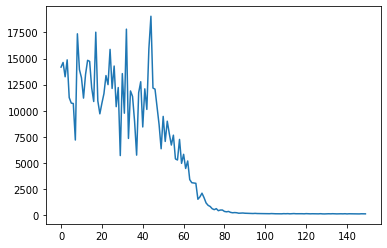

In [17]:
# Training

from torch.utils.data import DataLoader
from trainer.NP_trainer import SingleTaskNeuralProcessTrainer, MultiTaskNeuralProcessTrainer
from data_loader.data_loader import FGNetDataLoader

batch_size = 128
# num of training set = 17
num_context = 7
# num of test set = 1
num_target = 1


data_loader = FGNetDataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# All params = param of shared part + task_num * param of task-specific part
model_params = []
model_params += neuralprocess['encoder'].parameters()
for i in range(1):
    model_params += neuralprocess[i].parameters() 

optimizer = torch.optim.Adam(model_params, lr=3e-4)
mtnp_trainer = SingleTaskNeuralProcessTrainer(device, neuralprocess, optimizer,
                                  num_context_range=(num_context, num_context),
                                  num_extra_target_range=(num_target, num_target), 
                                  data_loader = data_loader)

neuralprocess['encoder'].training = True
# neuralprocess_decoder don't need to distinguish the state of training

mtnp_trainer.train(150)
#save first model parameters trained on the whole dataset
# torch.save(neuralprocess.state_dict(), r'D:\PycharmProjects\ANP\neural-processes\trained_models\age_estimation\firstWholeTrained.ckpt')
plt.plot(range(len(mtnp_trainer.epoch_loss_history)),mtnp_trainer.epoch_loss_history)
plt.show()

In [18]:
from datasets.datasets import FaceFeatureTestData, TestFeatureData

num_of_test_people = 10
testDataset = TestFeatureData(10)
test_batch_size = 1
testData_loader = FGNetDataLoader(testDataset, batch_size=test_batch_size, shuffle=True)

# for x_target, y_target in testData_loader:
#     print(x_target.size())
#     print(y_target.size())
print(len(testDataset)) # =10
print(len(testData_loader)) # =2
for i, data in enumerate(testData_loader):
    print('*****************************')
    print(i)
    print(data[0].size())
    print(data[1].size())

10
10
*****************************
0
torch.Size([1, 512])
torch.Size([1])
*****************************
1
torch.Size([1, 512])
torch.Size([1])
*****************************
2
torch.Size([1, 512])
torch.Size([1])
*****************************
3
torch.Size([1, 512])
torch.Size([1])
*****************************
4
torch.Size([1, 512])
torch.Size([1])
*****************************
5
torch.Size([1, 512])
torch.Size([1])
*****************************
6
torch.Size([1, 512])
torch.Size([1])
*****************************
7
torch.Size([1, 512])
torch.Size([1])
*****************************
8
torch.Size([1, 512])
torch.Size([1])
*****************************
9
torch.Size([1, 512])
torch.Size([1])


In [19]:
for i in range(10):
    print(-1- i)

-1
-2
-3
-4
-5
-6
-7
-8
-9
-10


In [20]:
# testDataset #num_of_test_people = 2

In [21]:
for batch in data_loader:
    break
# Use batch to create random set of context points
x, y = batch

print(x.size())
print(y.size())
x_context, y_context, _, _ =  SingleTaskNeuralProcessTrainer.context_target_split(x, y, 
                                                  num_context, 
                                                  num_target)

torch.Size([128, 512])
torch.Size([128])


In [22]:
# Testing

from datasets.datasets import TestFeatureData, FaceFeatureTestData

for batch in data_loader:
    break
# Use batch to create random set of context points
x, y = batch
x_context, y_context, _, _ =  SingleTaskNeuralProcessTrainer.context_target_split(x, y, 
                                                  num_context, 
                                                  num_target)

neuralprocess['encoder'].training = False

# testDataset = FaceFeatureTestData()
num_of_test_people = 199
testDataset = TestFeatureData(199)
test_batch_size = 1
testData_loader = FGNetDataLoader(testDataset, batch_size=test_batch_size, shuffle=True)

resultsOnPretrainedModelsList = []

for t in range(1):
    resultsOnPretrainedModel = []
    for x_target, y_target in testData_loader:
        test_target = y_target
        avg_mu = 0
        for i in range(1):
            z_sample = neuralprocess['encoder'](x_context, y_context, x_target)
            # print(z_sample.size())
            p_y_pred = neuralprocess[t](x_context, y_context, x_target, z_sample)
            # Extract mean of distribution
            mu = p_y_pred.loc.detach()
            avg_mu += mu
        avg_mu = avg_mu / 1
        print(avg_mu)
        avg_mu = avg_mu.view(1)
        resultsOnPretrainedModel.append(avg_mu.tolist())
#     print(len(resultsOnPretrainedModel))
    resultsOnPretrainedModelsList.append(resultsOnPretrainedModel)

tensor([[1.1487]])
tensor([[0.6948]])
tensor([[0.7192]])
tensor([[1.0201]])
tensor([[0.9979]])
tensor([[1.1170]])
tensor([[0.8382]])
tensor([[0.7456]])
tensor([[0.9588]])
tensor([[0.8099]])
tensor([[0.9200]])
tensor([[1.0186]])
tensor([[0.7301]])
tensor([[0.9057]])
tensor([[0.7818]])
tensor([[0.9887]])
tensor([[1.0024]])
tensor([[0.9896]])
tensor([[1.0249]])
tensor([[0.9404]])
tensor([[0.8571]])
tensor([[0.9550]])
tensor([[0.9342]])
tensor([[0.8102]])
tensor([[1.2301]])
tensor([[0.7582]])
tensor([[0.8865]])
tensor([[0.7662]])
tensor([[0.7954]])
tensor([[0.8381]])
tensor([[0.8083]])
tensor([[1.0693]])
tensor([[0.8233]])
tensor([[0.8738]])
tensor([[0.8683]])
tensor([[1.0472]])
tensor([[1.0215]])
tensor([[0.7838]])
tensor([[0.8046]])
tensor([[0.6345]])
tensor([[1.0380]])
tensor([[0.8800]])
tensor([[0.6314]])
tensor([[1.0995]])
tensor([[0.6992]])
tensor([[0.7774]])
tensor([[0.6804]])
tensor([[0.8989]])
tensor([[0.7161]])
tensor([[0.6735]])
tensor([[0.8886]])
tensor([[0.7548]])
tensor([[0.9

In [23]:
resultsOnPretrainedModelsList
# len(resultsOnPretrainedModelsList) # = 3 num_of_people
# len(resultsOnPretrainedModelsList[0]) # = 2 num_of_test_people
# len(resultsOnPretrainedModelsList[0][0]) # = 18 num_of_images_of_a_person

[[[1.1486819982528687],
  [0.694827675819397],
  [0.7191553711891174],
  [1.0201492309570312],
  [0.9978566765785217],
  [1.1169612407684326],
  [0.838160514831543],
  [0.7455553412437439],
  [0.9587992429733276],
  [0.809934139251709],
  [0.919955849647522],
  [1.0185744762420654],
  [0.7301031947135925],
  [0.9057337641716003],
  [0.7817837595939636],
  [0.988696277141571],
  [1.0023645162582397],
  [0.9895756840705872],
  [1.0249230861663818],
  [0.9404355883598328],
  [0.8571194410324097],
  [0.9550037384033203],
  [0.9341500997543335],
  [0.8101850152015686],
  [1.2300851345062256],
  [0.7581514120101929],
  [0.886528491973877],
  [0.7662021517753601],
  [0.7953816652297974],
  [0.8380569815635681],
  [0.8083494901657104],
  [1.0692514181137085],
  [0.8232883810997009],
  [0.8738111853599548],
  [0.8683072924613953],
  [1.0472450256347656],
  [1.0215375423431396],
  [0.7838274836540222],
  [0.8046179413795471],
  [0.6344648003578186],
  [1.0380221605300903],
  [0.8799581527709961]

In [24]:
# num_of_test_images = 18

# resultsOnPretrainedModels = []
# for i in range(num_of_test_images):
#     resultsWithSinglePerson = []
#     for list in resultsOnPretrainedModelsList:
#         resultsWithSinglePerson.append(list[0][i])
#     resultsOnPretrainedModels.append(resultsWithSinglePerson)
# resultsOnPretrainedModels = torch.FloatTensor(resultsOnPretrainedModels)

In [25]:
# resultsOnPretrainedModels